# Tabla de contenido
1. [Introduccción al Proyecto Sprint 10](#Introduccción-al-Proyecto-Sprint-10)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Acceso y preparación de datos](#Acceso-y-preparación-de-datos)
5. [Priorizar hipótesis](#Priorizar-hipótesis)
6. [Análisis del test A/B](#Análisis-del-test-A/B)


# Introducción al Proyecto Sprint 10

Este proyecto tiene como objetivo analizar y priorizar hipótesis para mejorar los ingresos de una tienda online y evaluar los resultados de un test A/B. Utilizando datos del departamento de marketing y ventas, las hipótesis serán evaluadas con los frameworks ICE y RICE para optimizar el proceso de selección. Posteriormente, se realizará un análisis detallado del test A/B, que permitirá determinar la efectividad de las estrategias propuestas.

# Objetivos específicos

**1.** Priorizar las hipótesis para aumentar los ingresos utilizando los frameworks ICE y RICE.

**2.** Analizar el impacto del test A/B en las métricas clave de conversión y ventas.

**3.** Identificar posibles anomalías en los datos y calcular su significancia estadística.

# Etapas de análisis del proyecto

**1.** Preprocesamiento de datos: Limpieza y formateo de los datasets (hipótesis, pedidos, visitas).

**2.** Priorizar hipótesis: Aplicar los modelos ICE y RICE, ordenando las hipótesis según su viabilidad.

**3.** Análisis del test A/B: Visualizar y comparar ingresos, tamaño de pedido y tasa de conversión entre grupos.

**4.** Análisis estadístico: Evaluar la significancia estadística de las diferencias entre grupos, considerando datos brutos y filtrados.

**5.** Conclusiones: Tomar decisiones basadas en los resultados del test A/B.

# Acceso y preparación de datos

**Inicialización**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats

**Cargar y explorar los datos**

In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
pedidos = pd.read_csv('/datasets/orders_us.csv')

In [4]:
visitas = pd.read_csv('/datasets/visits_us.csv')

**hipotesis**

In [5]:
hipotesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
hipotesis.columns = hipotesis.columns.str.lower()

In [8]:
hipotesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [9]:
hipotesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [10]:
hipotesis.duplicated().sum()

0

**pedidos**

In [11]:
pedidos.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
pedidos.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
pedidos.duplicated().sum()

0

**visitas**

In [15]:
visitas.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitas.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [18]:
visitas.duplicated().sum()

0

**Pre-procesamiento de los datos**

* Verificar usuarios que podrían haber entrado tanto en el grupo A como en el grupo B y eliminarlos ya que podrían afectar el resultado del análisis.

In [19]:
#Búsqueda de usuarios que participaron tanto en el grupo A como en el grupo B

pedidos.groupby(['visitorId'])['group'].nunique().sort_values(ascending=False)

visitorId
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [20]:
pedidos.groupby(['visitorId'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')

,visitorId,group
0,2654030115,2
1,3891541246,2
2,3941795274,2
3,1404934699,2
4,351125977,2
5,3951559397,2
6,2927087541,2
7,3963646447,2
8,2458001652,2
9,3972127743,2


In [21]:
#Búsqueda de usuarios que participaron tanto en el grupo A como en el grupo B en el mismo día
usuarios_ambos_grupos = pedidos.groupby(['visitorId', 'date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')

**Observación**, se decidió descartar a los usuarios que participaron el mismo día en ambos grupos A y B porque este grupo de usuarios podría influir negativamente en el análisis ya que su motivación de compra era fuerte y similar para presentar ambas pruebas. En cambio, los usuarios que participaron en diferentes días en ambas pruebas no afectarían el análisis ya que su motivación y necesidad de compra son diferentes en cada fecha. 

In [22]:
usuarios_ambos_grupos['visitorId']

0     2587333274
1      477780734
2     2579882178
3     2038680547
4     1316129916
5      232979603
6     3891541246
7     1801183820
8     3062433592
9     1230306981
10     237748145
11    3951559397
12    2949041841
13    3963646447
14    2378935119
15    4266935830
16    2686716486
17    3202540741
18    1614305549
19    3717692402
20    2458001652
21    4256040402
22    3766097110
Name: visitorId, dtype: int64

In [23]:
pedidos_limpio = pedidos[~pedidos['visitorId'].isin(usuarios_ambos_grupos['visitorId'])]

In [24]:
pedidos = pedidos_limpio

**Cálculo de métricas acumuladas**

In [25]:
pedidos['date'] = pedidos['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [26]:
visitas['date'] = visitas['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [27]:
pedidos.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [28]:
visitas.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Recopilación de datos acumulados**

In [29]:
fecha_grupos = pedidos[['date','group']].drop_duplicates()

In [30]:
fecha_grupos

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [31]:
fecha_grupos.duplicated().sum()

0

In [32]:
pedidos_agg = fecha_grupos.apply(lambda x: pedidos[np.logical_and(pedidos['date'] <= x['date'], pedidos['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [33]:
visitas_agg = fecha_grupos.apply(lambda x: visitas[np.logical_and(visitas['date'] <= x['date'], visitas['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [34]:
 cumulativeData = pedidos_agg.merge(visitas_agg, left_on=['date', 'group'], right_on=['date', 'group'])

In [35]:
cumulativeData

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,19,19,1258.8,713
2,2019-08-02,A,43,37,3770.1,1338
3,2019-08-02,B,43,42,3882.6,1294
4,2019-08-03,A,67,61,5585.3,1845
...,...,...,...,...,...,...
57,2019-08-29,B,554,524,78801.1,17708
58,2019-08-30,A,499,471,57133.5,18037
59,2019-08-30,B,576,545,82123.7,18198
60,2019-08-31,A,509,480,58038.5,18736


In [36]:
cumulativeData.columns = ['date', 'group', 'orders', 'visitorId', 'revenue', 'visits']


In [37]:
print(cumulativeData.head(5))

        date group  orders  visitorId  revenue  visits
0 2019-08-01     A      23         19   2266.6     719
1 2019-08-01     B      19         19   1258.8     713
2 2019-08-02     A      43         37   3770.1    1338
3 2019-08-02     B      43         42   3882.6    1294
4 2019-08-03     A      67         61   5585.3    1845


# Priorizar hipótesis

**Framework ICE/RICE**

In [38]:
hipotesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [39]:
hipotesis.iloc[0,0]

'Add two new channels for attracting traffic. This will bring 30% more users'

In [40]:
hipotesis['ICE'] = hipotesis['impact']*hipotesis['confidence']/hipotesis['effort']

In [41]:
hipotesis['RICE'] = (hipotesis['reach']*hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']

In [42]:
hipotesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [43]:
hipotesis.sort_values(by='RICE', ascending=False, inplace=True)

In [44]:
hipotesis

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [45]:
hipotesis.iloc[0,0]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

**Observaciones** El aumento significativo de la puntuación al pasar de ICE a RICE indica que el factor "alcance" ha tenido un impacto considerable. Al agregar un formulario de suscripción a todas las páginas principales, se está exponiendo la oportunidad de suscripción a un número mucho mayor de usuarios. Esto aumenta significativamente el potencial de crecimiento de la lista de correo, lo que a su vez puede traducirse en un mayor retorno de la inversión en marketing por correo electrónico.

#  Análisis del test A/B

**Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

In [46]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [47]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

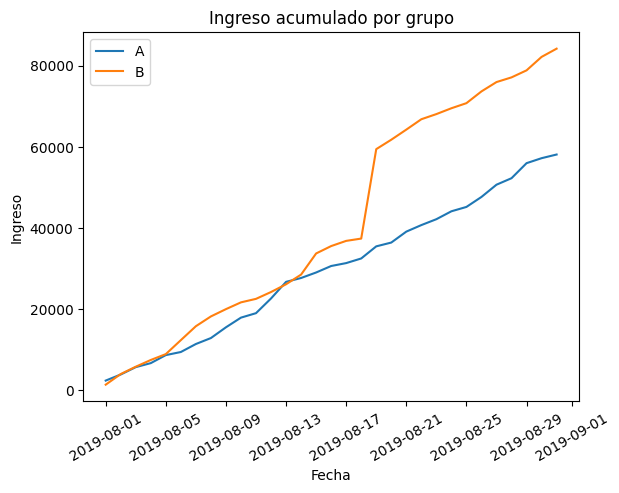

In [48]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso')
plt.xticks(rotation=30)
plt.show()


**Observación**: El grupo B (línea naranja) tiene un ingreso acumulado mayor y crece a un ritmo más rápido que el grupo A (línea azul). Esto sugiere que el grupo B ha generado consistentemente más ingresos que el grupo A a lo largo del experimento. 
En particular, entre el 13 y el 17 de agosto, el grupo B experimenta un aumento notorio en ingresos acumulados, lo que podría deberse a algún evento o promoción que impactó positivamente en las ventas de este grupo. Al final del período analizado (31 de agosto), la diferencia de ingresos acumulados sigue creciendo.

**Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.**

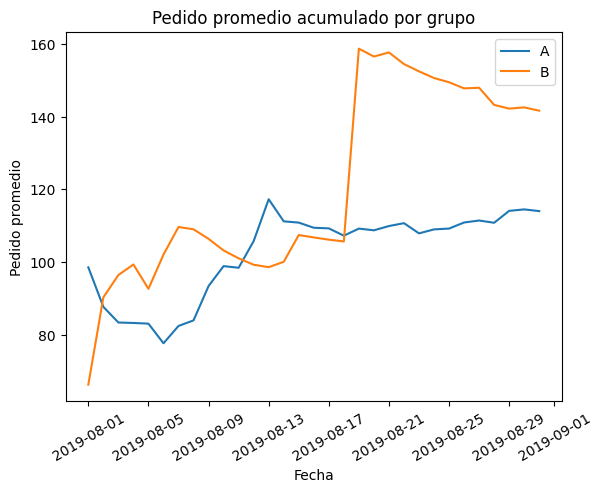

In [49]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Pedido promedio')
plt.xticks(rotation=30)
plt.show()

**Observación**: El grupo B (línea naranja) muestra un incremento significativo en el tamaño promedio del pedido acumulado alrededor de mediados de agosto, llegando a superar claramente al grupo A (línea azul). A partir de este aumento, el tamaño promedio del pedido del grupo B se mantiene consistentemente por encima del grupo A hasta el final del período, aunque muestra una ligera tendencia a la baja en las últimas fechas. El grupo B logra un tamaño de pedido promedio acumulado superior al grupo A durante la mayor parte del período. Este resultado sugiere que las condiciones aplicadas al grupo B lograron no solo aumentar la frecuencia de pedidos, sino también el valor promedio de cada transacción.


**Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

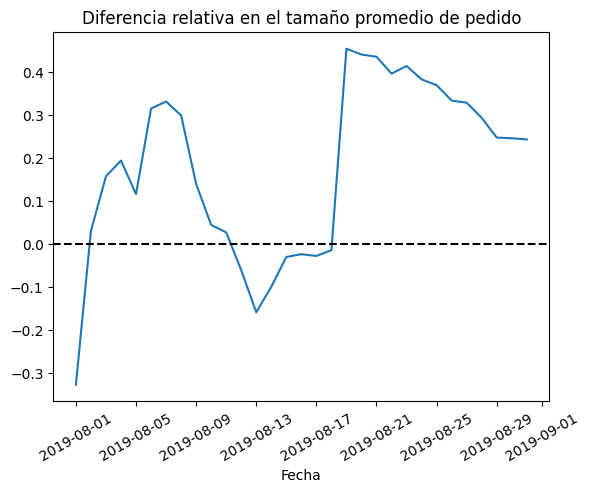

In [50]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia relativa en el tamaño promedio de pedido')
plt.xlabel('Fecha')
plt.xticks(rotation=30)
plt.show()

**Observación:** La línea azul muestra la diferencia relativa del tamaño de pedido promedio del grupo B en comparación con el grupo A a lo largo del tiempo. Inicialmente, el tamaño de pedido promedio del grupo B es menor que el del grupo A, con valores negativos hasta principios de agosto. A partir de la segunda semana de agosto, el tamaño promedio de pedido del grupo B comienza a superar al del grupo A, alcanzando picos en donde la diferencia relativa es de más del 40% en algunos puntos. 
La tendencia indica que el grupo B mantuvo un tamaño promedio de pedido acumulado mayor en comparación con el grupo A durante un período considerable en agosto.Esto sugiere que cualquier intervención aplicada al grupo B fue efectiva en incrementar el valor promedio de los pedidos, lo que podría tener implicaciones positivas en términos de ingresos si se considera extender estas condiciones a una mayor parte de la base de clientes.


**Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia.**

In [51]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

In [52]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [53]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

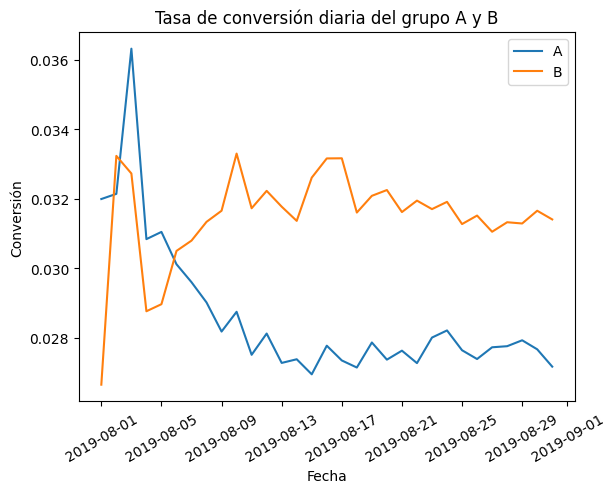

In [54]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Tasa de conversión diaria del grupo A y B')
plt.xlabel('Fecha')
plt.ylabel('Conversión')
plt.xticks(rotation=30)
plt.show()

**Observación**: El grupo A presenta una tasa de conversión inicial alta, con un pico significativo al comienzo del período. Luego, experimenta una disminución gradual, aunque con algunas fluctuaciones.
El grupo B muestra un comportamiento más estable, con un aumento inicial más gradual y menos pronunciado que el Grupo A. A partir de mediados del período, la tasa de conversión se mantiene relativamente constante, con pequeñas variaciones.La estrategia del Grupo A podría ser más agresiva al inicio, pero menos sostenible a largo plazo.La tasa de conversión más estable del grupo B indica que las acciones implementadas para este grupo están generando resultados más predecibles y confiables.


**Trazar un gráfico de diferencia relativa para las tasas de conversión acumuladas.**

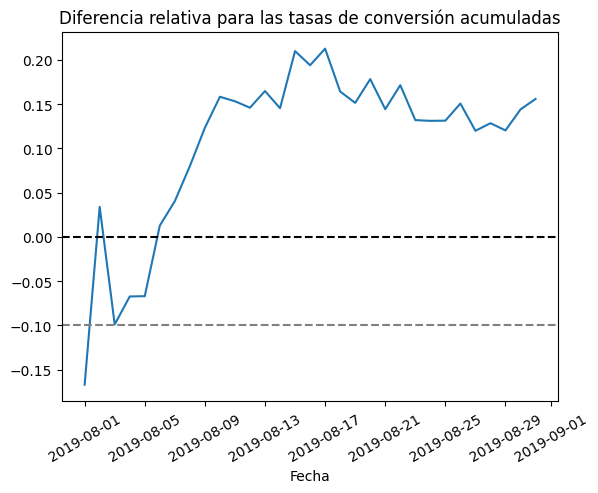

In [55]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Diferencia relativa para las tasas de conversión acumuladas')
plt.xlabel('Fecha')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=30)
plt.show()


**Observaciones:** Al inicio de la prueba, el grupo B estaba notablemente rezagado pero a mediados de agosto tomó la delantera  y  empezó a crecer gradualmente manteniendo su conversión.

**Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

* Se realizó el conteo de pedidos por usuario utilizando el dataset 'pedidos'.

In [56]:
pedidos_por_usuario = pedidos.groupby('visitorId')['transactionId'].count().reset_index()

In [57]:
pedidos_por_usuario

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1003,4259830713,1
1004,4278982564,1
1005,4279090005,1
1006,4281247801,1


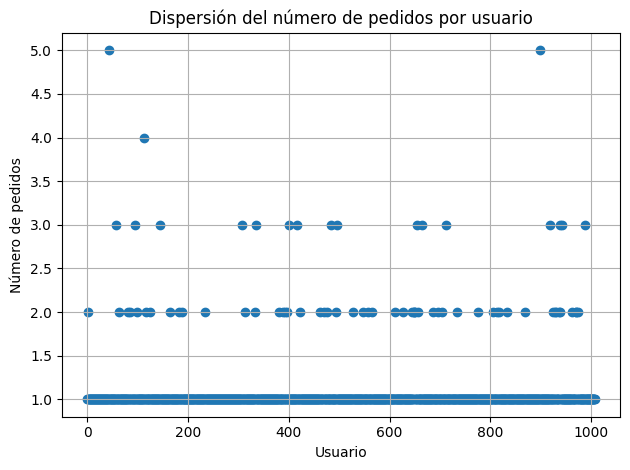

In [58]:
x_values = pd.Series(range(0,len(pedidos_por_usuario)))
plt.scatter(x_values, pedidos_por_usuario['transactionId'])
plt.title('Dispersión del número de pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observaciones:** La gran mayoría de los usuarios realiza entre 1 y 3 pedidos. Existe un grupo más reducido de usuarios que realiza entre 3 y 5 pedidos, y solo unos pocos usuarios realizan más de 5 pedidos. La mayoría de los clientes tienden a realizar un número relativamente bajo de pedidos.Existe un pequeño segmento de clientes que realiza un número significativamente mayor de pedidos. Estos clientes podrían ser considerados como "clientes leales" o "compradores compulsivos".La mayor parte de los pedidos se concentra en un rango relativamente estrecho. Esto indica que la distribución de los pedidos no es muy dispersa y que existe un patrón de compra relativamente homogéneo entre los usuarios.

**Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [59]:
np.percentile(pedidos_por_usuario['transactionId'], [95, 99])

array([2., 3.])

**Observación:** El 95% de los usuarios realizaron 2 o menos pedidos. Esto significa que el 5% de los usuarios más activos realizaron más de 2 pedidos.El 99% de los usuarios realizaron 3 o menos pedidos. Esto implica que solo el 1% de los usuarios más activos realizó más de 3 pedidos.La gran mayoría de los usuarios (95%) realiza una cantidad relativamente baja de pedidos (2 o menos). Esto sugiere que el comportamiento típico de los usuarios es realizar pocas transacciones.Sería razonable fijar un umbral de dos órdenes por usuario como límite superior para un comportamiento normal y utilizarlo para filtrar cualquier anomalía.

**Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

* Se realizó el gráfico registrando la cantidad de ingreso por pedido utilizando el dataset 'pedidos'.

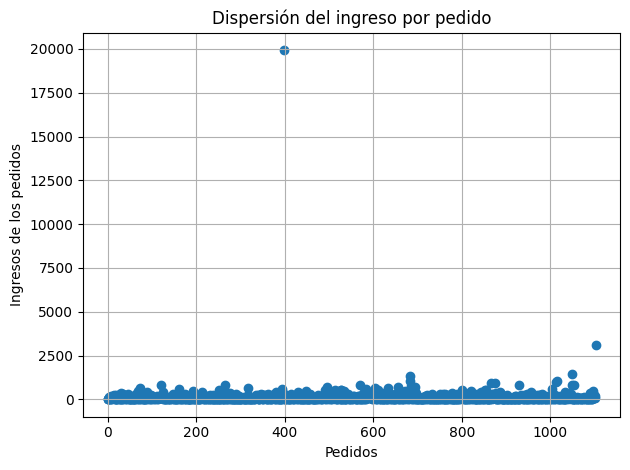

In [60]:
x_values = pd.Series(range(0, len(pedidos['revenue'])))
plt.scatter(x_values, pedidos['revenue'])
plt.title('Dispersión del ingreso por pedido')
plt.xlabel('Pedidos')
plt.ylabel('Ingresos de los pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observaciones:** La gran mayoría de los pedidos generan ingresos relativamente bajos, concentrados en la parte inferior del eje Y. Sin embargo, existen algunos pedidos que generan ingresos significativamente más altos, representando puntos aislados en la parte superior del gráfico.La mayoría de los pedidos generan ingresos similares, lo que indica una baja variabilidad en el valor de los productos o servicios ofrecidos.Existe un pequeño grupo de pedidos que generan ingresos mucho más altos que el promedio. Estos pedidos podrían corresponder a productos o servicios premium, ventas a grandes clientes o promociones especiales.  Para maximizar los ingresos altos, es importante identificar estos pedidos y desarrollar estrategias para aumentar su frecuencia. 

**Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [61]:
precios_por_pedido = pedidos.groupby('transactionId')['revenue'].sum().reset_index()

In [62]:
precios_por_pedido

,transactionId,revenue
0,1062393,100.8
1,4919758,40.2
2,7210578,60.5
3,8131427,75.5
4,11068804,75.7
...,...,...
1098,4276811111,55.2
1099,4279408906,15.8
1100,4281129020,60.2
1101,4288552432,10.8


In [63]:
np.percentile(pedidos['revenue'], [95, 99])

array([419.14, 830.01])

**Observación:** El 95% de los pedidos tienen un valor de 419.14 o menos. Esto significa que el 5% de los pedidos más caros tienen un valor superior a 419.14.El 99% de los pedidos tienen un valor de 830.01  o menos. Esto implica que solo el 1% de los pedidos más caros tienen un valor superior a 830.01.Si un pedido tiene un valor superior a 830.01 (percentil 99), podríamos considerarlo como un caso atípico o una anomalía.

**Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [64]:
ordersByUsersA = pedidos[pedidos['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']


In [65]:
ordersByUsersB = pedidos[pedidos['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [66]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [67]:
sampleB = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [68]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.881
-0.010


**Observaciones:** El valor de p de 0.881 indica que no hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B, ya que este valor está muy por encima del umbral comúnmente utilizado de 0.05. Esto sugiere que las conversiones en ambos grupos no son lo suficientemente diferentes como para concluir que cualquier cambio observado se deba a un efecto de la intervención y no al azar.La diferencia porcentual promedio de -0.010 sugiere que el grupo B tiene una tasa de conversión ligeramente menor que el grupo A (un 1% menor), pero esta diferencia es muy pequeña y no es significativa desde el punto de vista estadístico.ado que no hay evidencia estadísticamente significativa de que la tasa de conversión difiera entre los grupos, es probable que la intervención o modificación aplicada al grupo B no haya tenido un impacto en la tasa de conversión.Es posible que se necesiten ajustes en la intervención o experimentar con otras variables para lograr un impacto medible en la conversión.

**Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [69]:
print('{0:.3f}'.format(stats.mannwhitneyu(pedidos[pedidos['group']=='A']['revenue'], pedidos[pedidos['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(pedidos[pedidos['group']=='B']['revenue'].mean()/pedidos[pedidos['group']=='A']['revenue'].mean()-1))

0.653
0.242


**Observaciones:** Un valor de p de 0.653 indica que no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B.La diferencia porcentual en el tamaño promedio de pedido es de 24.2%, lo que sugiere que, en promedio, el grupo B tiene pedidos un 24.2% mayores que el grupo A. Aunque esto puede parecer una diferencia notable, el análisis estadístico indica que esta variación no es estadísticamente significativa y podría deberse al azar.


**Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [70]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = pedidos[pedidos['revenue'] > 419]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
18      199603092
928     204675465
35      249864742
Name: visitorId, dtype: int64
(66,)


En total, tenemos 66 usuarios anómalos. 

**Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [71]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [72]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.015
0.174


**Observaciones:** Un valor de p de 0.015 indica que la diferencia en el tamaño promedio de pedido entre los grupos A y B es estadísticamente significativa al nivel de significancia típico de 0.05. Esto significa que, después de filtrar los datos para eliminar usuarios anómalos, la diferencia observada en el tamaño de pedido promedio entre los dos grupos no parece deberse al azar, sino a un efecto real. La diferencia porcentual muestra que el grupo B tiene un tamaño de pedido promedio un 17.4% mayor que el grupo A. Dado que esta diferencia es significativa estadísticamente, sugiere que el grupo B efectivamente tiene pedidos más grandes en promedio, lo que podría deberse a la intervención o cambio aplicado. A diferencia del análisis con los datos en bruto, los datos filtrados revelan una diferencia estadísticamente significativa en el tamaño de pedido promedio. Esto sugiere que los usuarios anómalos, que fueron excluidos en esta ocasión, podrían haber estado afectando la interpretación inicial de los datos.La significancia estadística observada en el grupo B sugiere que la intervención aplicada en este grupo podría estar impulsando un tamaño promedio de pedido más alto. 

In [73]:
print("{0:.3f}".format(stats.mannwhitneyu(
    pedidos[np.logical_and(
        pedidos['group']=='A',  
        np.logical_not(pedidos['visitorId'].isin(abnormalUsers)))]['revenue'], 
    pedidos[np.logical_and(
        pedidos['group']=='B',  
        np.logical_not(pedidos['visitorId'].isin(abnormalUsers)))]['revenue']  
)[1])) 


print("{0:.3f}".format(
    pedidos[np.logical_and(pedidos['group']=='B', 
           np.logical_not(pedidos['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /  
    pedidos[np.logical_and(pedidos['group']=='A', 
           np.logical_not(pedidos['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))       


0.576
-0.044


**Observaciones:** Un valor de p de 0.576 indica que no hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B después de filtrar los usuarios anómalos. Este resultado sugiere que cualquier diferencia observada en el tamaño promedio de los pedidos es probablemente debida al azar y no a un efecto real de la intervención.La diferencia porcentual entre los grupos muestra que el grupo B tiene un tamaño de pedido promedio un 4.4% menor que el grupo A. Sin embargo, dado que esta diferencia no es estadísticamente significativa, no se puede concluir que el grupo B tenga un tamaño de pedido promedio menor de forma concluyente.La intervención en el grupo B no parece tener un impacto significativo en el tamaño promedio de los pedidos, según estos datos filtrados. Es decir, una vez eliminados los usuarios anómalos, no se observa una diferencia relevante en el tamaño promedio de pedido entre los dos grupos.Dado que no hay evidencia estadísticamente significativa de un efecto positivo de la intervención sobre el tamaño de pedido, se podría reconsiderar la intervención en el grupo B o revisar la estrategia aplicada. 

**Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.**

**Conclusión de los Resultados:**

1. **Tasa de Conversión:** La prueba indica que no hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B (valor de p = 0.881). La diferencia en la tasa de conversión es muy pequeña (-1%) y no significativa. Esto sugiere que la intervención en el grupo B no tuvo un efecto notable en la tasa de conversión.

2. **Tamaño Promedio de Pedido (Datos en Bruto):** Cuando se analizan los datos sin filtrar, la diferencia en el tamaño promedio de pedido no es estadísticamente significativa (valor de p = 0.653). Aunque el grupo B muestra un tamaño de pedido un 24.2% mayor en promedio, esta diferencia podría deberse al azar y no a un efecto de la intervención.

3. **Tamaño Promedio de Pedido (Datos Filtrados):** En los datos filtrados para eliminar usuarios anómalos, la diferencia en el tamaño promedio de pedido se vuelve estadísticamente significativa (valor de p = 0.015), con el grupo B teniendo un tamaño de pedido promedio un 17.4% mayor que el grupo A. Esto sugiere un posible efecto real de la intervención en el tamaño de los pedidos.

4. **Tamaño Promedio de Pedido (Datos Filtrados):** Otro análisis de los datos filtrados muestra nuevamente que la diferencia no es significativa (valor de p = 0.576), indicando que la intervención podría no estar teniendo un efecto claro o consistente sobre el tamaño de los pedidos.

**Decisión: Parar la prueba, concluir que no hay diferencia entre los grupos.**

**Justificación de la Decisión**

Dado que los análisis muestran una falta de significancia estadística en las métricas clave (tasa de conversión y tamaño promedio de pedido en la mayoría de las pruebas), no hay suficiente evidencia para continuar con la prueba o para considerar que uno de los grupos es superior al otro. Aunque hubo una diferencia significativa en un análisis del tamaño promedio de pedido en los datos filtrados, los resultados inconsistentes sugieren que esta diferencia puede no ser robusta o lo suficientemente estable para tomar decisiones sobre la intervención.

Por lo tanto, la recomendación es **detener la prueba y concluir que no hay diferencia significativa** entre los grupos en términos de tasa de conversión y tamaño promedio de pedido, lo cual sugiere que la intervención aplicada al grupo B no tiene un efecto claro o consistente.